<a href="https://colab.research.google.com/github/alimahatma/DatawarehouseRSUD/blob/master/02_pytorch_regresi_linear_lalumutawalli_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

pada latihan kali ini kita akan menggunakan model regresi liner untuk melakukan prediksi apel (apple) dan jeruk (orange) pada suatu tempat, prediksi kedua buah tersebut ditentukan berdasarkan tiga buah fitur yaitu:
- temperature
- rainfall
- humidity 
pada suatu wilayah

In [165]:
import numpy as np
import torch

In [166]:
inputs = np.array([[73, 67, 43],
                   [91, 88, 64],
                   [87, 134, 58],
                   [102, 43, 37],
                   [69, 96, 70]], dtype='float32')


In [167]:
targets = np.array([[56, 70],
                    [81, 101],
                    [119, 133],
                    [22, 37],
                    [103, 119]], dtype='float32')

melakukan konversi dari array menjadi pytorch tensor

In [168]:
inputs = torch.from_numpy(inputs)
targets = torch.from_numpy(targets)
print(inputs)
print(targets)

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])
tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


membuat model regresi linear (RL), untuk membuat RL kita membutuhkan bobot (W) dan bias (b) 

In [169]:
w = torch.rand(2, 3, requires_grad=True)
b = torch.rand(2, requires_grad=True)
print(w)
print(b)

tensor([[0.4627, 0.4572, 0.0416],
        [0.4108, 0.0883, 0.6425]], requires_grad=True)
tensor([0.1349, 0.9220], requires_grad=True)


In [170]:
inputs

tensor([[ 73.,  67.,  43.],
        [ 91.,  88.,  64.],
        [ 87., 134.,  58.],
        [102.,  43.,  37.],
        [ 69.,  96.,  70.]])

In [171]:
inputs @ w.t() + b

tensor([[ 66.3347,  64.4587],
        [ 85.1385,  87.2012],
        [104.0707,  85.7654],
        [ 68.5300,  70.3983],
        [ 78.8664,  82.7244]], grad_fn=<AddBackward0>)

In [172]:
def model(x):
  return x @ w.t() + b

In [173]:
preds = model(inputs)
print(preds)

tensor([[ 66.3347,  64.4587],
        [ 85.1385,  87.2012],
        [104.0707,  85.7654],
        [ 68.5300,  70.3983],
        [ 78.8664,  82.7244]], grad_fn=<AddBackward0>)


In [174]:
print(targets)

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])


In [175]:
diff = preds - targets
torch.sum(diff * diff) / diff.numel()

tensor(797.7876, grad_fn=<DivBackward0>)

LOSS FUNCTION, Secara simple loss function digunakan untuk mengukur seberapa bagus performa dari neural network kita dalam melakukan prediksi terhadap target.

In [176]:
#MSE loss
def mse(t1, t2):
  diff = t1 - t2
  return torch.sum(diff * diff) / diff.numel()


In [177]:
#compute loss
loss = mse(preds, targets)
print(loss)

tensor(797.7876, grad_fn=<DivBackward0>)


Back-Propagation proses ini bermaksud untuk menyesuaikan kembali tiap weight dan bias berdasarkan error yang didapat pada saat forward pass.

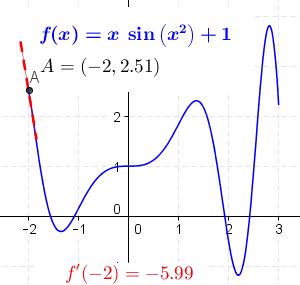


**Compute gradient **
dengan pytorch kita dapat melakukan compute gradient secara automatis atau derivative loss.

In [178]:
loss.backward()

In [179]:
print(w)
print(w.grad)

tensor([[0.4627, 0.4572, 0.0416],
        [0.4108, 0.0883, 0.6425]], requires_grad=True)
tensor([[  582.6066,  -251.9890,   -24.8767],
        [ -973.2003, -1992.2651, -1032.9117]])


In [180]:
print(b)
print(b.grad)

tensor([0.1349, 0.9220], requires_grad=True)
tensor([  4.3881, -13.8904])


In [181]:
print(b)
b - b.grad * 1e-5

tensor([0.1349, 0.9220], requires_grad=True)


tensor([0.1348, 0.9221], grad_fn=<SubBackward0>)

In [182]:
print(w)
w.grad

tensor([[0.4627, 0.4572, 0.0416],
        [0.4108, 0.0883, 0.6425]], requires_grad=True)


tensor([[  582.6066,  -251.9890,   -24.8767],
        [ -973.2003, -1992.2651, -1032.9117]])

In [183]:
print(w)
w - w.grad * 1e-5

tensor([[0.4627, 0.4572, 0.0416],
        [0.4108, 0.0883, 0.6425]], requires_grad=True)


tensor([[0.4569, 0.4598, 0.0418],
        [0.4206, 0.1082, 0.6528]], grad_fn=<SubBackward0>)

In [184]:
with torch.no_grad():
  w -= w.grad * 1e-5
  b -= b.grad * 1e-5

In [185]:
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(738.9546, grad_fn=<DivBackward0>)


In [186]:
w.grad.zero_()
b.grad.zero_()
print(w.grad)
print(b.grad)

tensor([[0., 0., 0.],
        [0., 0., 0.]])
tensor([0., 0.])


#Training model menggunakan gradient descent 
1. Generate prediction
2. Calculate the loss
3. Compute gradient w.r.t the weight and biass
4. Adjust the weight by subtracting a small quantity propotional to gradient
5. Reset the gradients to zero




In [187]:
#generate predictions
preds = model(inputs)
print(preds)


tensor([[ 66.0889,  66.9482],
        [ 84.8459,  90.5013],
        [103.9159,  89.8810],
        [ 68.0533,  72.6300],
        [ 78.7237,  86.0316]], grad_fn=<AddBackward0>)


In [188]:
#calculate the loss
loss = mse(preds, targets)
print(loss)

tensor(738.9546, grad_fn=<DivBackward0>)


In [189]:
#compute gradients
loss.backward()
print(w.grad)
print(b.grad)

tensor([[  559.3041,  -271.4212,   -38.0574],
        [ -714.0157, -1707.8363,  -858.7050]])
tensor([  4.1255, -10.8016])


In [190]:
#Adjust weight & reset gradients
##adjust weight
with torch.no_grad():
  w -= w.grad * 1e-5
  b -= b.grad * 1e-5

  ##reset gradient
  w.grad.zero_()
  b.grad.zero_()



In [191]:
print(w)
print(b)

tensor([[0.4513, 0.4625, 0.0422],
        [0.4277, 0.1253, 0.6614]], requires_grad=True)
tensor([0.1348, 0.9222], requires_grad=True)


In [192]:
#Calculate loss
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(696.8365, grad_fn=<DivBackward0>)


#Training sebanyak 100 epoch
untuk mereduksi loss lebih lanjut, kita dapat melakukan prerulangan proses dari "Adjusing the weight dan bias" menggunakan gradient multiple times. setiap iterasi disebut dengan "Epoch".

In [193]:
for i in range(100):
  preds = model(inputs)
  loss = mse(preds, targets)
  loss.backward()
  with torch.no_grad():
    w -= w.grad * 1e-5
    b -= b.grad * 1e-5
    w.grad.zero_()
    b.grad.zero_()

In [194]:
#Calculate loss
preds = model(inputs)
loss = mse(preds, targets)
print(loss)

tensor(186.7852, grad_fn=<DivBackward0>)


In [195]:
#prediksi
preds

tensor([[ 61.5932,  74.7870],
        [ 81.3051, 102.9560],
        [113.6257, 120.5637],
        [ 46.2972,  62.0723],
        [ 85.6627, 108.6736]], grad_fn=<AddBackward0>)

In [196]:
targets

tensor([[ 56.,  70.],
        [ 81., 101.],
        [119., 133.],
        [ 22.,  37.],
        [103., 119.]])

In [197]:
!pip install jovian --upgrade -q

In [198]:
import jovian

In [199]:
jovian.commit(project='02-linear-regression')

[jovian] Detected Colab notebook...


[jovian] Error: Colab File Id is not provided. Make sure to execute the cell where the Id is set.
